**Implemented a hybrid optimization technique by combining Particle Swarm Optimization (PSO) and Adam to enhance model performance.**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Flatten
from sklearn.metrics import accuracy_score

# Load and preprocess the IMDb dataset
max_features = 10000  # Vocabulary size
maxlen = 200  # Max length of the review

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Define the ANN architecture with 6 layers
def create_ann(weights=None):
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=maxlen))
    model.add(LSTM(128, return_sequences=True))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    if weights is not None:
        model.set_weights(weights)

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Particle Swarm Optimization (PSO)
class Particle:
    def __init__(self, shape):
        self.position = [np.random.uniform(-1, 1, s) for s in shape]  # Random initial position
        self.velocity = [np.random.uniform(-1, 1, s) for s in shape]  # Random initial velocity
        self.best_position = self.position.copy()
        self.best_score = float('inf')

    def update_velocity(self, global_best_position, inertia=0.5, cognitive=1.5, social=1.5):
        for i in range(len(self.velocity)):
            inertia_comp = inertia * self.velocity[i]
            cognitive_comp = cognitive * np.random.rand() * (self.best_position[i] - self.position[i])
            social_comp = social * np.random.rand() * (global_best_position[i] - self.position[i])
            self.velocity[i] = inertia_comp + cognitive_comp + social_comp

    def update_position(self):
        for i in range(len(self.position)):
            self.position[i] += self.velocity[i]

# Fitness function to evaluate the particle's position (weights)
def fitness_function(weights):
    model = create_ann(weights)
    model.fit(x_train, y_train, epochs=1, batch_size=64, verbose=0)  # Quick evaluation
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    return loss  # Minimize the loss

# PSO algorithm
def pso_optimization(n_particles=10, n_iterations=20):
    shape = [w.shape for w in create_ann().get_weights()]
    particles = [Particle(shape) for _ in range(n_particles)]
    global_best_position = None
    global_best_score = float('inf')

    for iteration in range(n_iterations):
        for particle in particles:
            # Evaluate fitness
            current_score = fitness_function(particle.position)

            # Update personal best
            if current_score < particle.best_score:
                particle.best_score = current_score
                particle.best_position = particle.position.copy()

            # Update global best
            if current_score < global_best_score:
                global_best_score = current_score
                global_best_position = particle.position.copy()

        # Update velocities and positions
        for particle in particles:
            particle.update_velocity(global_best_position)
            particle.update_position()

        print(f"Iteration {iteration+1}/{n_iterations}, Best Loss: {global_best_score}")

    return global_best_position

# Hybrid Optimization (PSO + Adam)
def hybrid_optimization(n_particles=10, n_pso_iterations=20, n_adam_epochs=5):
    # 1. Run PSO to find a good set of initial weights
    best_weights_pso = pso_optimization(n_particles=n_particles, n_iterations=n_pso_iterations)

    # 2. Create the ANN model with the best PSO weights and fine-tune with Adam
    model = create_ann(best_weights_pso)

    # Fine-tune the model using Adam optimizer
    history = model.fit(x_train, y_train, epochs=n_adam_epochs, batch_size=64, validation_data=(x_test, y_test))

    # Evaluate the final model
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

    # Save accuracy and loss
    history_data = {
        'accuracy': history.history['val_accuracy'],
        'loss': history.history['val_loss']
    }

    print(f"Final accuracy: {accuracy}, Final loss: {loss}")
    return model, history_data

# Run the hybrid optimization (PSO + Adam)
best_model, history1 = hybrid_optimization(n_particles=10, n_pso_iterations=20, n_adam_epochs=5)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Iteration 1/20, Best Loss: 0.28715282678604126
Iteration 2/20, Best Loss: 0.2845440208911896
Iteration 3/20, Best Loss: 0.2845440208911896
Iteration 4/20, Best Loss: 0.2845440208911896
Iteration 5/20, Best Loss: 0.2845440208911896
Iteration 6/20, Best Loss: 0.2831883728504181
Iteration 7/20, Best Loss: 0.2831883728504181
Iteration 8/20, Best Loss: 0.2831883728504181
Iteration 9/20, Best Loss: 0.2831883728504181
Iteration 10/20, Best Loss: 0.2831883728504181
Iteration 11/20, Best Loss: 0.2831883728504181
Iteration 12/20, Best Loss: 0.2831883728504181
Iteration 13/20, Best Loss: 0.2831883728504181
Iteration 14/20, Best Loss: 0.2831883728504181
Iteration 15/20, Best Loss: 0.2831883728504181
Iteration 16/20, Best Loss: 0.2831883728504181
Iteration 17/20, Best Loss: 0.2831883728504181
Iteration 18/20, Best Loss: 0.2831883728504181
Iteration 19/20, Best Loss: 0.2831883728504181
Iteration 20/20, Best Loss: 0.2831883728504181
Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.7

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Flatten
import random
import copy

# Load and preprocess the IMDb dataset
max_features = 10000  # Vocabulary size
maxlen = 200  # Max length of the review

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Define the ANN architecture with 6 layers
def create_ann(weights=None):
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=maxlen))
    model.add(LSTM(128, return_sequences=True))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    if weights is not None:
        model.set_weights(weights)

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Particle Swarm Optimization (PSO)
class Particle:
    def __init__(self, shape):
        self.position = [np.random.uniform(-1, 1, s) for s in shape]
        self.velocity = [np.random.uniform(-1, 1, s) for s in shape]
        self.best_position = copy.deepcopy(self.position)
        self.best_score = float('inf')

    def update_velocity(self, global_best_position, inertia=0.5, cognitive=1.5, social=1.5):
        for i in range(len(self.velocity)):
            inertia_comp = inertia * self.velocity[i]
            cognitive_comp = cognitive * np.random.rand() * (self.best_position[i] - self.position[i])
            social_comp = social * np.random.rand() * (global_best_position[i] - self.position[i])
            self.velocity[i] = inertia_comp + cognitive_comp + social_comp

    def update_position(self):
        for i in range(len(self.position)):
            self.position[i] += self.velocity[i]

# Genetic Algorithm functions: Selection, Crossover, Mutation
def crossover(parent1, parent2, crossover_rate=0.5):
    child = copy.deepcopy(parent1)
    for i in range(len(parent1)):
        if np.random.rand() < crossover_rate:
            child[i] = parent2[i]
    return child

def mutate(particle, mutation_rate=0.01):
    for i in range(len(particle)):
        if np.random.rand() < mutation_rate:
            particle[i] = np.random.uniform(-1, 1, particle[i].shape)
    return particle

# Fitness function for evaluation
def fitness_function(weights):
    model = create_ann(weights)
    model.fit(x_train, y_train, epochs=1, batch_size=64, verbose=0)  # Fast evaluation
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    return loss  # Minimize the loss

# PSO Phase
def pso_phase(n_particles=10, n_iterations=10):
    shape = [w.shape for w in create_ann().get_weights()]
    particles = [Particle(shape) for _ in range(n_particles)]
    global_best_position = None
    global_best_score = float('inf')

    for iteration in range(n_iterations):
        for particle in particles:
            current_score = fitness_function(particle.position)

            if current_score < particle.best_score:
                particle.best_score = current_score
                particle.best_position = copy.deepcopy(particle.position)

            if current_score < global_best_score:
                global_best_score = current_score
                global_best_position = copy.deepcopy(particle.position)

        for particle in particles:
            particle.update_velocity(global_best_position)
            particle.update_position()

        print(f"PSO Iteration {iteration+1}/{n_iterations}, Best Loss: {global_best_score}")

    return particles, global_best_position

# Genetic Algorithm Phase
def ga_phase(particles, n_ga_iterations=10, crossover_rate=0.7, mutation_rate=0.01):
    for iteration in range(n_ga_iterations):
        next_generation = []
        for _ in range(len(particles)):
            # Selection (choose two parents randomly)
            parent1 = random.choice(particles).best_position
            parent2 = random.choice(particles).best_position
            # Crossover
            child_position = crossover(parent1, parent2, crossover_rate)
            # Mutation
            mutated_position = mutate(child_position, mutation_rate)
            # Evaluate child
            child = Particle([w.shape for w in create_ann().get_weights()])
            child.position = mutated_position
            child.best_position = copy.deepcopy(mutated_position)
            child.best_score = fitness_function(mutated_position)
            next_generation.append(child)

        particles = next_generation
        best_particle = min(particles, key=lambda p: p.best_score)
        print(f"GA Iteration {iteration+1}/{n_ga_iterations}, Best Loss: {best_particle.best_score}")

    best_particle = min(particles, key=lambda p: p.best_score)
    return best_particle.best_position

# Hybrid PSO + GA Optimization
def hybrid_optimization(n_particles=10, n_pso_iterations=10, n_ga_iterations=10):
    # 1. PSO Phase: Find a good initial set of weights
    particles, global_best_position = pso_phase(n_particles, n_pso_iterations)

    # 2. GA Phase: Refine the solutions using Genetic Algorithm
    best_weights_ga = ga_phase(particles, n_ga_iterations)

    # 3. Final ANN Model with optimized weights from PSO + GA
    model = create_ann(best_weights_ga)

    # Train and evaluate the model
    history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

    # Save accuracy and loss
    history_data = {
        'accuracy': history.history['val_accuracy'],
        'loss': history.history['val_loss']
    }

    print(f"Final accuracy: {accuracy}, Final loss: {loss}")
    return model, history_data

# Run Hybrid PSO + GA Optimization
best_model, history2 = hybrid_optimization(n_particles=10, n_pso_iterations=10, n_ga_iterations=10)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


PSO Iteration 1/10, Best Loss: 0.28545713424682617
PSO Iteration 2/10, Best Loss: 0.2814388871192932
PSO Iteration 3/10, Best Loss: 0.2814388871192932
PSO Iteration 4/10, Best Loss: 0.2814388871192932
PSO Iteration 5/10, Best Loss: 0.2814388871192932
PSO Iteration 6/10, Best Loss: 0.2814388871192932
PSO Iteration 7/10, Best Loss: 0.2814388871192932
PSO Iteration 8/10, Best Loss: 0.2814388871192932
PSO Iteration 9/10, Best Loss: 0.2814388871192932
PSO Iteration 10/10, Best Loss: 0.2814388871192932
GA Iteration 1/10, Best Loss: 0.28618279099464417
GA Iteration 2/10, Best Loss: 0.28610923886299133
GA Iteration 3/10, Best Loss: 0.2854199707508087
GA Iteration 4/10, Best Loss: 0.286820650100708
GA Iteration 5/10, Best Loss: 0.28569158911705017
GA Iteration 6/10, Best Loss: 0.28679990768432617
GA Iteration 7/10, Best Loss: 0.2817402184009552
GA Iteration 8/10, Best Loss: 0.2897378206253052
GA Iteration 9/10, Best Loss: 0.28388679027557373
GA Iteration 10/10, Best Loss: 0.2882995307445526
Epo

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
import copy
import random

# Load and preprocess the IMDb dataset
max_features = 10000  # Vocabulary size
maxlen = 200  # Max length of the review

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Define the ANN architecture with 6 layers
def create_ann(weights=None):
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=maxlen))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    if weights is not None:
        model.set_weights(weights)

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Particle Swarm Optimization (PSO)
class Particle:
    def __init__(self, shape):
        self.position = [np.random.uniform(-1, 1, s) for s in shape]
        self.velocity = [np.random.uniform(-1, 1, s) for s in shape]
        self.best_position = copy.deepcopy(self.position)
        self.best_score = float('inf')

    def update_velocity(self, global_best_position, inertia=0.5, cognitive=1.5, social=1.5):
        for i in range(len(self.velocity)):
            inertia_comp = inertia * self.velocity[i]
            cognitive_comp = cognitive * np.random.rand() * (self.best_position[i] - self.position[i])
            social_comp = social * np.random.rand() * (global_best_position[i] - self.position[i])
            self.velocity[i] = inertia_comp + cognitive_comp + social_comp

    def update_position(self):
        for i in range(len(self.position)):
            self.position[i] += self.velocity[i]

# Bat Algorithm (BA)
class Bat:
    def __init__(self, shape, freq_min=0, freq_max=2):
        self.position = [np.random.uniform(-1, 1, s) for s in shape]
        self.velocity = [np.zeros(s) for s in shape]
        self.frequency = np.random.uniform(freq_min, freq_max)
        self.loudness = np.random.uniform(0.5, 1)
        self.pulse_rate = np.random.uniform(0, 1)
        self.best_position = copy.deepcopy(self.position)
        self.best_score = float('inf')

    def update_velocity(self, global_best_position):
        for i in range(len(self.velocity)):
            self.velocity[i] = self.velocity[i] + self.frequency * (self.position[i] - global_best_position[i])

    def update_position(self):
        for i in range(len(self.position)):
            self.position[i] += self.velocity[i]

# Fitness function for evaluation
def fitness_function(weights):
    model = create_ann(weights)
    model.fit(x_train, y_train, epochs=1, batch_size=64, verbose=0)
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    return loss

# PSO Phase
def pso_phase(n_particles=10, n_iterations=10):
    shape = [w.shape for w in create_ann().get_weights()]
    particles = [Particle(shape) for _ in range(n_particles)]
    global_best_position = None
    global_best_score = float('inf')

    for iteration in range(n_iterations):
        for particle in particles:
            current_score = fitness_function(particle.position)

            if current_score < particle.best_score:
                particle.best_score = current_score
                particle.best_position = copy.deepcopy(particle.position)

            if current_score < global_best_score:
                global_best_score = current_score
                global_best_position = copy.deepcopy(particle.position)

        for particle in particles:
            particle.update_velocity(global_best_position)
            particle.update_position()

        print(f"PSO Iteration {iteration+1}/{n_iterations}, Best Loss: {global_best_score}")

    return particles, global_best_position

# Bat Algorithm Phase
def bat_phase(bats, global_best_position, n_bat_iterations=10, alpha=0.9, gamma=0.9):
    shape = [w.shape for w in create_ann().get_weights()]

    for iteration in range(n_bat_iterations):
        for bat in bats:
            bat.update_velocity(global_best_position)
            bat.update_position()

            new_position = copy.deepcopy(bat.position)
            new_score = fitness_function(new_position)

            if new_score < bat.best_score and np.random.rand() < bat.loudness:
                bat.best_position = new_position
                bat.best_score = new_score
                bat.loudness *= alpha  # Reduce loudness
                bat.pulse_rate = bat.pulse_rate * (1 - np.exp(-gamma * iteration))

        best_bat = min(bats, key=lambda b: b.best_score)
        print(f"Bat Algorithm Iteration {iteration+1}/{n_bat_iterations}, Best Loss: {best_bat.best_score}")

    best_bat = min(bats, key=lambda b: b.best_score)
    return best_bat.best_position

# Hybrid PSO + Bat Algorithm Optimization
def hybrid_optimization(n_particles=10, n_pso_iterations=10, n_bat_iterations=10):
    # 1. PSO Phase: Find a good initial set of weights
    particles, global_best_position = pso_phase(n_particles, n_pso_iterations)

    # 2. Bat Algorithm Phase: Refine the solutions using Bat Algorithm
    bats = [Bat([w.shape for w in create_ann().get_weights()]) for _ in range(n_particles)]
    best_weights_ba = bat_phase(bats, global_best_position, n_bat_iterations)

    # 3. Final ANN Model with optimized weights from PSO + Bat Algorithm
    model = create_ann(best_weights_ba)

    # Train and evaluate the model
    history=model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test), verbose=2)
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

    print(f"Final accuracy: {accuracy}, Final loss: {loss}")
    return model,history

# Run Hybrid PSO + Bat Algorithm Optimization
best_model,history3 = hybrid_optimization(n_particles=10, n_pso_iterations=10, n_bat_iterations=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


KeyboardInterrupt: 

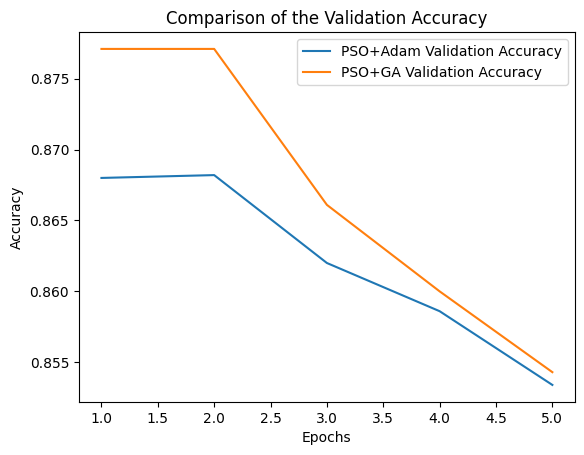

In [ ]:
history_adam={"Epoch" : [1,2,3,4,5],"Accuracy" : [0.8680, 0.8682, 0.8620, 0.8586, 0.8534], "Loss" :[]}
history_GA={"Epoch" : [1,2,3,4,5],"Accuracy" : [0.8771, 0.8771, 0.8661, 0.8600, 0.8543]}
import matplotlib.pyplot as plt
plt.plot(history_adam["Epoch"], history_adam["Accuracy"], label='PSO+Adam Validation Accuracy')
plt.plot(history_GA["Epoch"], history_GA["Accuracy"], label='PSO+GA Validation Accuracy')
# Add title and labels
plt.title('Comparison of the Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#Display legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.nn.utils import prune
from sklearn.metrics import accuracy_score
from torchtext.datasets import IMDB

# Load the IMDb dataset using torchtext
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torch.nn.utils.rnn import pad_sequence

tokenizer = get_tokenizer('basic_english')

# Prepare data
def yield_tokens(data_iter):
    for _, text in data_iter:
        yield tokenizer(text)

train_iter, test_iter = IMDB(split=('train', 'test'))

vocab = build_vocab_from_iterator(yield_tokens(train_iter), specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])

# Convert text to tensor
def text_pipeline(x): return vocab(tokenizer(x))

def process_data(data_iter, max_len=200):
    data, labels = [], []
    for label, text in data_iter:
        tokens = text_pipeline(text)[:max_len]
        data.append(torch.tensor(tokens))
        labels.append(1 if label == 'pos' else 0)

    return pad_sequence(data, batch_first=True), torch.tensor(labels)

x_train, y_train = process_data(train_iter)
x_test, y_test = process_data(test_iter)

train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the ANN architecture with 6 layers in PyTorch
class ANNModel(nn.Module):
    def __init__(self, vocab_size=10000, embed_size=128, max_len=200):
        super(ANNModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, 128, batch_first=True)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * max_len, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 16)
        self.output = nn.Linear(16, 1)

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.lstm(x)
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        return torch.sigmoid(self.output(x))

# Particle Swarm Optimization (PSO)
class Particle:
    def __init__(self, shape):
        self.position = [np.random.uniform(-1, 1, s) for s in shape]  # Random initial position
        self.velocity = [np.random.uniform(-1, 1, s) for s in shape]  # Random initial velocity
        self.best_position = self.position.copy()
        self.best_score = float('inf')

    def update_velocity(self, global_best_position, inertia=0.5, cognitive=1.5, social=1.5):
        for i in range(len(self.velocity)):
            inertia_comp = inertia * self.velocity[i]
            cognitive_comp = cognitive * np.random.rand() * (self.best_position[i] - self.position[i])
            social_comp = social * np.random.rand() * (global_best_position[i] - self.position[i])
            self.velocity[i] = inertia_comp + cognitive_comp + social_comp

    def update_position(self):
        for i in range(len(self.position)):
            self.position[i] += self.velocity[i]

# Fitness function to evaluate the particle's position (weights)
def fitness_function(model, optimizer, loss_fn):
    model.train()
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x.long())
        loss = loss_fn(outputs.squeeze(), batch_y.float())
        loss.backward()
        optimizer.step()
    return loss.item()

# PSO algorithm
def pso_optimization(model, n_particles=10, n_iterations=20):
    shape = [p.size() for p in model.parameters()]
    particles = [Particle(shape) for _ in range(n_particles)]
    global_best_position = None
    global_best_score = float('inf')

    loss_fn = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for iteration in range(n_iterations):
        for particle in particles:
            # Evaluate fitness
            current_score = fitness_function(model, optimizer, loss_fn)

            # Update personal best
            if current_score < particle.best_score:
                particle.best_score = current_score
                particle.best_position = particle.position.copy()

            # Update global best
            if current_score < global_best_score:
                global_best_score = current_score
                global_best_position = particle.position.copy()

        # Update velocities and positions
        for particle in particles:
            particle.update_velocity(global_best_position)
            particle.update_position()

        print(f"Iteration {iteration+1}/{n_iterations}, Best Loss: {global_best_score}")

    return global_best_position

# Accuracy calculation helper function
def calculate_accuracy(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_x, batch_y in loader:
            outputs = model(batch_x.long())
            predicted = (outputs.squeeze() > 0.5).float()
            total += batch_y.size(0)
            correct += (predicted == batch_y.float()).sum().item()
    return correct / total

# Hybrid Optimization (PSO + Adam) + Pruning + History
def hybrid_optimization(model, n_particles=10, n_pso_iterations=20, n_adam_epochs=5):
    # 1. Run PSO to find a good set of initial weights
    best_weights_pso = pso_optimization(model, n_particles=n_particles, n_iterations=n_pso_iterations)

    # 2. Fine-tune the model using Adam optimizer
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    loss_fn = nn.BCELoss()

    # Initialize history for loss and accuracy
    history = {'train_loss': [], 'val_loss': [], 'val_accuracy': []}

    for epoch in range(n_adam_epochs):
        model.train()
        running_loss = 0.0
        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_x.long())
            loss = loss_fn(outputs.squeeze(), batch_y.float())
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Average training loss for this epoch
        avg_train_loss = running_loss / len(train_loader)

        # Validation loss and accuracy
        val_loss = 0.0
        with torch.no_grad():
            for batch_x, batch_y in test_loader:
                outputs = model(batch_x.long())
                loss = loss_fn(outputs.squeeze(), batch_y.float())
                val_loss += loss.item()
        avg_val_loss = val_loss / len(test_loader)

        val_accuracy = calculate_accuracy(model, test_loader)

        # Store loss and accuracy in history
        history['train_loss'].append(avg_train_loss)
        history['val_loss'].append(avg_val_loss)
        history['val_accuracy'].append(val_accuracy)

        print(f"Adam Epoch {epoch+1}/{n_adam_epochs}, Train Loss: {avg_train_loss}, Val Loss: {avg_val_loss}, Val Accuracy: {val_accuracy}")

    # 3. Apply pruning to the fine-tuned model
    parameters_to_prune = (
        (model.fc1, 'weight'),
        (model.fc2, 'weight'),
        (model.fc3, 'weight'),
    )

    # Prune 20% of weights in each dense layer
    for layer, param in parameters_to_prune:
        prune.l1_unstructured(layer, name=param, amount=0.2)

    # Remove pruning mask for deployment
    for layer, param in parameters_to_prune:
        prune.remove(layer, param)

    return model, history

# Initialize the model
model = ANNModel(vocab_size=len(vocab), embed_size=128, max_len=200)

# Run the hybrid optimization (PSO + Adam + Pruning)
best_model, history = hybrid_optimization(model, n_particles=10, n_pso_iterations=20, n_adam_epochs=5)

OSError: /usr/local/lib/python3.10/dist-packages/torchtext/lib/libtorchtext.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs

In [ ]:
!pip install --force-reinstall torch
!pip install --force-reinstall torchtext

  Using cached filelock-3.16.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached sympy-1.13.3-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.3-py3-none-any.whl.metadata (5.1 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached MarkupSafe-2.1.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.0 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.1/797.1 MB 822.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 709.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━

  Using cached torchtext-0.18.0-cp310-cp310-manylinux1_x86_64.whl.metadata (7.9 kB)
  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached torch-2.4.1-cp310-cp310-manylinux1_x86_64.whl.metadata (26 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 1.4 MB/s eta 0:00:00
  Using cached filelock-3.16.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached sympy-1.13.3-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.3-py3-none-any.whl.metadata (5.1 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached fsspec-2024.9.0-py3-none-any.whl.metadata (11 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.